**SET UP**

In [1]:
# Imports
import pandas as pd
import os
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

cwd = os.getcwd() # Get current directory

In [2]:
print(cwd)

C:\Users\lirik\Desktop\RGR Analysis\scripts


**DATA WRANGLING**

***Data Description***

In [3]:
# load CSV 
df_path = cwd + "\\data\\rgr_data_test.csv" # filepath
df_rgr = pd.read_csv(df_path) # df

display(df_rgr) # check output

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31033,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,14,29.6,61,2.06,NaN,NaN
31034,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,28,55.5,123,2.22,NaN,NaN
31035,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,56,62.8,138,2.20,NaN,NaN
31036,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,84,67.1,145,2.16,NaN,NaN


In [4]:
# basic description of data

print("Non-Null Counts:")
df_rgr.info()
print("-----------------------------------------")

print("Duplicate Rows:")
df_rgr[df_rgr.duplicated()]
print("-----------------------------------------")

print("Unique Values:")
print(df_rgr.nunique())

print("-----------------------------------------")
print("Descriptive Statistics:")
print(df_rgr.describe([0, 0.05, 0.50, 0.95, 0.99, 1]))

Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31038 entries, 0 to 31037
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RIDER_ID                         31038 non-null  int64  
 1   LOCATION                         31038 non-null  object 
 2   APPLICATION_DATE                 30024 non-null  object 
 3   APPLICATION_APPROVED_DATE        30078 non-null  object 
 4   FIRST_WORK_DATE                  31038 non-null  object 
 5   ACQUISITION_CHANNEL              31038 non-null  object 
 6   VEHICLE_TYPE                     31038 non-null  object 
 7   DAYS_SINCE_ACQUISITION           31038 non-null  int64  
 8   HOURS_WORKED_CUMULATIVE          31038 non-null  float64
 9   ORDERS_DELIVERED_CUMULATIVE      31038 non-null  int64  
 10  THROUGHPUT_CUMULATIVE            31038 non-null  float64
 11  REFERRALS_CUMULATIVE             4056 non-null   float64
 12  S

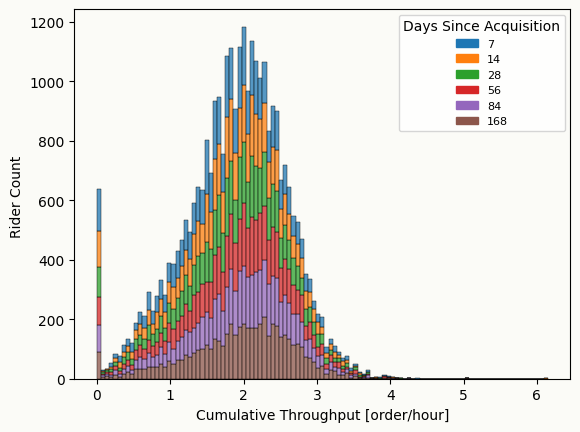

In [5]:
#histplot
ax = sns.histplot(df_rgr, x="THROUGHPUT_CUMULATIVE", hue="DAYS_SINCE_ACQUISITION", multiple="stack", palette="tab10", fill=True)

#legend
unique_values = sorted(df_rgr["DAYS_SINCE_ACQUISITION"].unique())  # Ensure sorted order for consistency
colors = sns.color_palette("tab10", len(unique_values))  # Generate colors
legend_patches = [Patch(color=colors[i], label=str(val)) for i, val in enumerate(unique_values)]
# Add the legend
ax.legend(handles=legend_patches, title="Days Since Acquisition", loc="upper right", fontsize = 8)

#axis label
ax.set(xlabel='Cumulative Throughput [order/hour]', ylabel='Rider Count ')

#set background colour
plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

***Irregularities***

*Irregularities to explore:*

*1. See if application dates are chornologically consistent*

*2. See if referral counts are consistent*

*3. Understand effect of zero order drivers*

*4. 99th Percentile and 100th Percentile increase*

*1. See if application dates are chronologically consistent*

In [6]:
# get application date or working date as null
null_mask = df_rgr['APPLICATION_DATE'].isnull() | df_rgr['APPLICATION_APPROVED_DATE'].isnull()

# apply to df
null_rows = df_rgr[null_mask]

# repeat the same procedure but for getting working date as not null
df_rgr_nulls = df_rgr[null_mask]

not_null_mask = df_rgr_nulls['FIRST_WORK_DATE'].notnull()
anomaly_dates = df_rgr_nulls[not_null_mask]

print("Anomaly row count:")
print(len(anomaly_dates['RIDER_ID'].unique()))

Anomaly row count:
169


In [7]:
#remove anomaly_dates from df_rgr
df_rgr = df_rgr[~null_mask]

*2. See if referral counts are consistent*

In [8]:
print("Number of inconsistent referral counts:")
print(len(df_rgr.loc[(df_rgr['SUCCESSFUL_REFERRALS_CUMULATIVE'] > df_rgr['REFERRALS_CUMULATIVE'])]))

Number of inconsistent referral counts:
0


*3. Understand effect of zero order drivers*

In [9]:
riders_with_zero_throughput = df_rgr[df_rgr["THROUGHPUT_CUMULATIVE"] == 0]["RIDER_ID"]

filtered_df = df_rgr[df_rgr["RIDER_ID"].isin(riders_with_zero_throughput)]

In [10]:
filtered_df

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
205,79934,Roo York,2016-07-23 00:00:00.000000000,2016-12-03 00:00:00.000000000,2016-12-13,Digital,Bicycle,7,0.4,0,0.00,NaN,NaN
206,79934,Roo York,2016-07-23 00:00:00.000000000,2016-12-03 00:00:00.000000000,2016-12-13,Digital,Bicycle,14,0.4,0,0.00,NaN,NaN
207,79934,Roo York,2016-07-23 00:00:00.000000000,2016-12-03 00:00:00.000000000,2016-12-13,Digital,Bicycle,28,3.7,9,2.44,NaN,NaN
208,79934,Roo York,2016-07-23 00:00:00.000000000,2016-12-03 00:00:00.000000000,2016-12-13,Digital,Bicycle,56,26.5,87,3.28,NaN,NaN
209,79934,Roo York,2016-07-23 00:00:00.000000000,2016-12-03 00:00:00.000000000,2016-12-13,Digital,Bicycle,84,26.5,87,3.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30907,99180,Roo York,2017-02-07 00:00:00.000000000,2017-03-05 00:00:00.000000000,2017-03-09,Offline,Bicycle,14,0.3,0,0.00,NaN,NaN
30908,99180,Roo York,2017-02-07 00:00:00.000000000,2017-03-05 00:00:00.000000000,2017-03-09,Offline,Bicycle,28,0.3,0,0.00,NaN,NaN
30909,99180,Roo York,2017-02-07 00:00:00.000000000,2017-03-05 00:00:00.000000000,2017-03-09,Offline,Bicycle,56,0.3,0,0.00,NaN,NaN
30910,99180,Roo York,2017-02-07 00:00:00.000000000,2017-03-05 00:00:00.000000000,2017-03-09,Offline,Bicycle,84,0.3,0,0.00,NaN,NaN


In [11]:
print("Hours worked mean")
print(df_rgr['HOURS_WORKED_CUMULATIVE'][df_rgr["THROUGHPUT_CUMULATIVE"] == 0].mean())

print("Hours worked median")
print(df_rgr['HOURS_WORKED_CUMULATIVE'][df_rgr["THROUGHPUT_CUMULATIVE"] == 0].median())

print("Days aquisition mean")
print(df_rgr['DAYS_SINCE_ACQUISITION'][df_rgr["THROUGHPUT_CUMULATIVE"] == 0].mean())
print("Days aquisition median")
print(df_rgr['DAYS_SINCE_ACQUISITION'][df_rgr["THROUGHPUT_CUMULATIVE"] == 0].median())

rider_ids_with_zero_throughput = df_rgr[df_rgr["THROUGHPUT_CUMULATIVE"] == 0]['RIDER_ID'].unique()
print(len(rider_ids_with_zero_throughput))

Hours worked mean
2.3518518518518516
Hours worked median
0.9
Days aquisition mean
52.56199677938808
Days aquisition median
28.0
139


In [12]:
# remove these, as they seem to be either churned or riders who did not engage earlier on
df_rgr = df_rgr[df_rgr.ORDERS_DELIVERED_CUMULATIVE != 0]

*4. 99th Percentile and 100th Percentile increase*

In [13]:
# deal with outliers by replacing edge cases with lower and upper limits determined from IQR

def outlier_thresholds(dataframe, variable):
    """
    Calculate the lower and upper outlier thresholds for a given variable in the dataframe.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the variable.
        variable (str): The name of the variable for which outlier thresholds will be calculated.

    Returns:
        tuple: A tuple containing the lower and upper outlier thresholds.
    """
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()

def replace_with_thresholds(dataframe, variable):
    """
    Replace the outliers in the given variable of the dataframe with the lower and upper thresholds.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the variable.
        variable (str): The name of the variable for which outliers will be replaced.

    Returns:
        None  
    """
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe[variable] = dataframe[variable].apply(
        lambda x: low_limit if x < low_limit else (up_limit if x > up_limit else x)
    )
    return dataframe

In [14]:
replace_with_thresholds(df_rgr,"THROUGHPUT_CUMULATIVE")

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31033,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,14,29.6,61,2.06,NaN,NaN
31034,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,28,55.5,123,2.22,NaN,NaN
31035,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,56,62.8,138,2.20,NaN,NaN
31036,101217,Roo York,2017-02-27 00:00:00.000000000,2017-03-18 00:00:00.000000000,2017-03-18,Digital,Scooter / Motorcycle,84,67.1,145,2.16,NaN,NaN


*Histogram Plot*

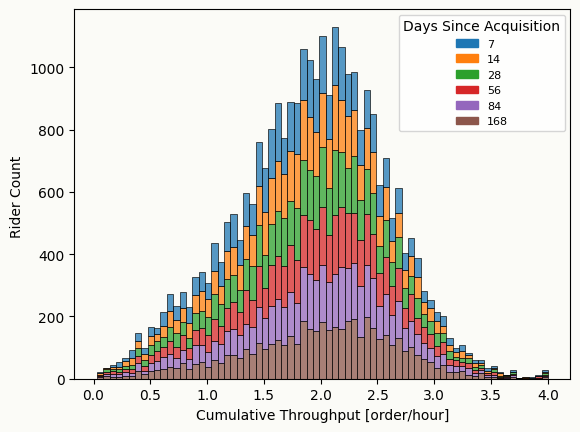

In [15]:
#histplot
ax = sns.histplot(df_rgr, x="THROUGHPUT_CUMULATIVE", hue="DAYS_SINCE_ACQUISITION", multiple="stack", palette="tab10", fill=True)

#legend
unique_values = sorted(df_rgr["DAYS_SINCE_ACQUISITION"].unique())  # Ensure sorted order for consistency
colors = sns.color_palette("tab10", len(unique_values))  # Generate colors
legend_patches = [Patch(color=colors[i], label=str(val)) for i, val in enumerate(unique_values)]
# Add the legend
ax.legend(handles=legend_patches, title="Days Since Acquisition", loc="upper right", fontsize = 8)

#axis label
ax.set(xlabel='Cumulative Throughput [order/hour]', ylabel='Rider Count ')

#set background colour
plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

In [16]:
stat, crit_values, sig_levels = stats.anderson(df_rgr["THROUGHPUT_CUMULATIVE"].dropna(), dist='norm')
print("Anderson-Darling Test Result:")
print(f"Test statistic: {stat}")
for i in range(len(crit_values)):
    print(f"Critical value at {sig_levels[i]}% significance: {crit_values[i]}")
if stat > crit_values[2]:  # Typically use 5% significance level (index 2)
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

Anderson-Darling Test Result:
Test statistic: 48.3248086282656
Critical value at 15.0% significance: 0.576
Critical value at 10.0% significance: 0.656
Critical value at 5.0% significance: 0.787
Critical value at 2.5% significance: 0.918
Critical value at 1.0% significance: 1.092
The data does not follow a normal distribution.


In [17]:
# basic description of data

print("Non-Null Counts:")
df_rgr.info()
print("-----------------------------------------")

print("Duplicate Rows:")
df_rgr[df_rgr.duplicated()]
print("-----------------------------------------")

print("Unique Values:")
print(df_rgr.nunique())

print("-----------------------------------------")
print("Descriptive Statistics:")
print(df_rgr.describe([0, 0.05, 0.50, 0.95, 0.99, 1]))

Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 29403 entries, 0 to 31037
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RIDER_ID                         29403 non-null  int64  
 1   LOCATION                         29403 non-null  object 
 2   APPLICATION_DATE                 29403 non-null  object 
 3   APPLICATION_APPROVED_DATE        29403 non-null  object 
 4   FIRST_WORK_DATE                  29403 non-null  object 
 5   ACQUISITION_CHANNEL              29403 non-null  object 
 6   VEHICLE_TYPE                     29403 non-null  object 
 7   DAYS_SINCE_ACQUISITION           29403 non-null  int64  
 8   HOURS_WORKED_CUMULATIVE          29403 non-null  float64
 9   ORDERS_DELIVERED_CUMULATIVE      29403 non-null  int64  
 10  THROUGHPUT_CUMULATIVE            29403 non-null  float64
 11  REFERRALS_CUMULATIVE             3912 non-null   float64
 12  SUCCES

**How has RGR performed? How does that compare with other channels?**

***BASIC ANALYSIS***

Location and Vehicle numbers

C:\Users\lirik\AppData\Local\Temp\ipykernel_15900\1952707011.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='LOCATION', y='RIDER_ID', palette="viridis")


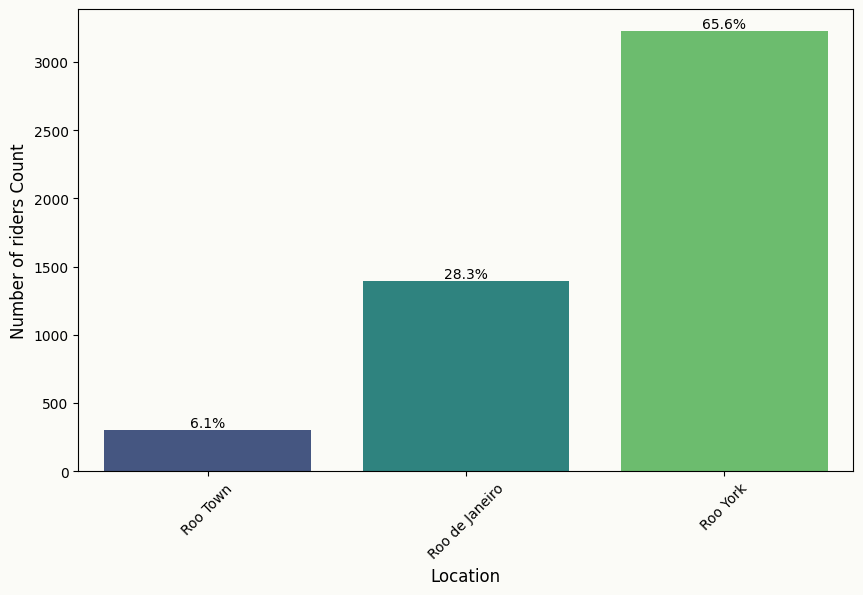

In [18]:
# Vehicle Count#

# count accross location
series = df_rgr.groupby('LOCATION')['RIDER_ID'].nunique()  # Use .nunique() to count unique riders
df = pd.DataFrame({'LOCATION': series.index, 'RIDER_ID': series.values})
df = df.sort_values(by='RIDER_ID', ascending=True)

# percentage
total_drivers = df['RIDER_ID'].sum()
df['Percentage'] = (df['RIDER_ID'] / total_drivers) * 100

# plot
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = sns.barplot(data=df, x='LOCATION', y='RIDER_ID', palette="viridis")

for container in ax.patches:
    height = container.get_height()
    x_position = container.get_x() + container.get_width() / 2
    percentage = round((height / total_drivers) * 100, 1)  # Round to one decimal place
    ax.text(x_position, height + 0.5, f"{percentage}%", ha='center', va='bottom', fontsize=10)

plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of riders Count", fontsize=12)

plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()


In [19]:

# Perform ANOVA to test for significant differences between locations
anova_location = stats.f_oneway(
    *[df_rgr[df_rgr['LOCATION'] == location]['RIDER_ID'].values for location in df_rgr['LOCATION'].unique()]
)

print(f"ANOVA p-value (Location): {anova_location.pvalue}")

# If p-value < 0.05, perform Tukey's HSD for pairwise comparisons
if anova_location.pvalue < 0.05:
    print("\nSignificant difference found between location, running Tukey's HSD test:")
    tukey_location = pairwise_tukeyhsd(df_rgr['RIDER_ID'], df_rgr['LOCATION'])
    print(tukey_location)

ANOVA p-value (Location): 2.6171085914732674e-75

Significant difference found between location, running Tukey's HSD test:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1      group2      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
Roo Town       Roo York  1812.6384    0.0  1080.7935  2544.4834   True
Roo Town Roo de Janeiro -1231.3319 0.0005 -2002.9287  -459.7352   True
Roo York Roo de Janeiro -3043.9704    0.0  -3432.565 -2655.3758   True
----------------------------------------------------------------------


C:\Users\lirik\AppData\Local\Temp\ipykernel_15900\2173227053.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='VEHICLE_TYPE', y='RIDER_ID', palette="viridis")


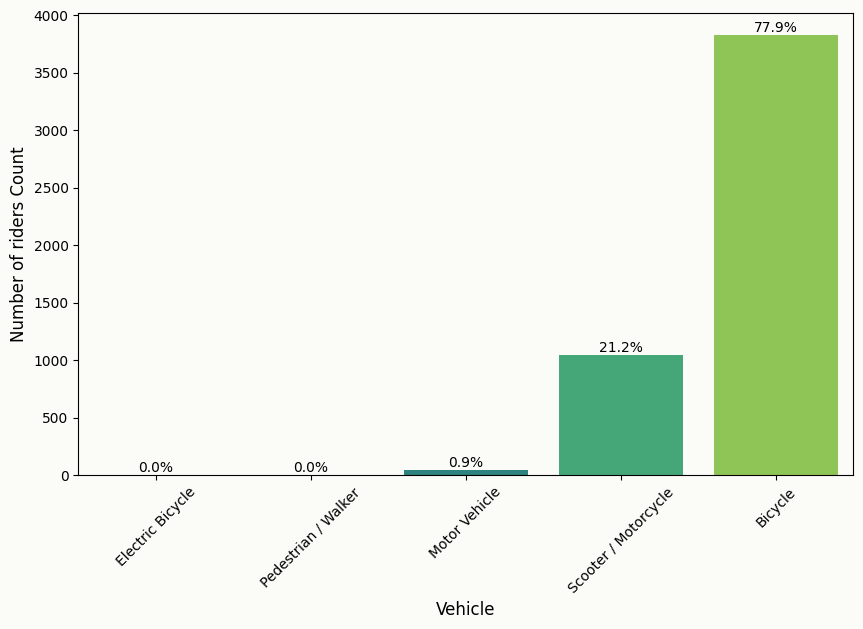

In [20]:
# Vehicle Count#

# count accross location
series = df_rgr.groupby('VEHICLE_TYPE')['RIDER_ID'].nunique()  # Use .nunique() to count unique riders
df = pd.DataFrame({'VEHICLE_TYPE': series.index, 'RIDER_ID': series.values})
df = df.sort_values(by='RIDER_ID', ascending=True)

# percentage
total_drivers = df['RIDER_ID'].sum()
df['Percentage'] = (df['RIDER_ID'] / total_drivers) * 100

# plot
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = sns.barplot(data=df, x='VEHICLE_TYPE', y='RIDER_ID', palette="viridis")

for container in ax.patches:
    height = container.get_height()
    x_position = container.get_x() + container.get_width() / 2
    percentage = round((height / total_drivers) * 100, 1)  # Round to one decimal place
    ax.text(x_position, height + 0.5, f"{percentage}%", ha='center', va='bottom', fontsize=10)

plt.xlabel("Vehicle", fontsize=12)
plt.ylabel("Number of riders Count", fontsize=12)

plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()


In [21]:

# Perform ANOVA to test for significant differences between locations
anova_location = stats.f_oneway(
    *[df_rgr[df_rgr['VEHICLE_TYPE'] == location]['RIDER_ID'].values for location in df_rgr['VEHICLE_TYPE'].unique()]
)

print(f"ANOVA p-value (Location): {anova_location.pvalue}")

# If p-value < 0.05, perform Tukey's HSD for pairwise comparisons
if anova_location.pvalue < 0.05:
    print("\nSignificant difference found between location, running Tukey's HSD test:")
    tukey_year = pairwise_tukeyhsd(df_rgr['RIDER_ID'], df_rgr['VEHICLE_TYPE'])
    print(tukey_year)

ANOVA p-value (Location): 3.971798194930525e-293

Significant difference found between location, running Tukey's HSD test:
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1              group2         meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------------------------
            Bicycle     Electric Bicycle -6926.1751 0.3017 -16719.7775  2867.4274  False
            Bicycle        Motor Vehicle -5646.9846    0.0  -7795.2888 -3498.6804   True
            Bicycle  Pedestrian / Walker  8251.8249 0.1453  -1541.7775 18045.4274  False
            Bicycle Scooter / Motorcycle   6413.184    0.0   5928.4993  6897.8686   True
   Electric Bicycle        Motor Vehicle  1279.1905 0.9969  -8742.2556 11300.6366  False
   Electric Bicycle  Pedestrian / Walker    15178.0 0.0234   1331.3824 29024.6176   True
   Electric Bicycle Scooter / Motorcycle  13339.359 0.0019   3538.8953 23139

Referral Patterns

In [22]:
# Group channels to make easier
referral_channels = ['Referral']

# Step 1: Create a new column 'Acquisition_Label' to label riders
df_rgr['RGR_LABEL'] = df_rgr['ACQUISITION_CHANNEL'].apply(
    lambda x: 'REFERRAL' if x in referral_channels else 'OTHER'
)

# Check the changes
print(df_rgr[['RIDER_ID', 'ACQUISITION_CHANNEL', 'RGR_LABEL']].head())

   RIDER_ID ACQUISITION_CHANNEL RGR_LABEL
0     73350             Organic     OTHER
1     73350             Organic     OTHER
2     73350             Organic     OTHER
3     73350             Organic     OTHER
4     73350             Organic     OTHER


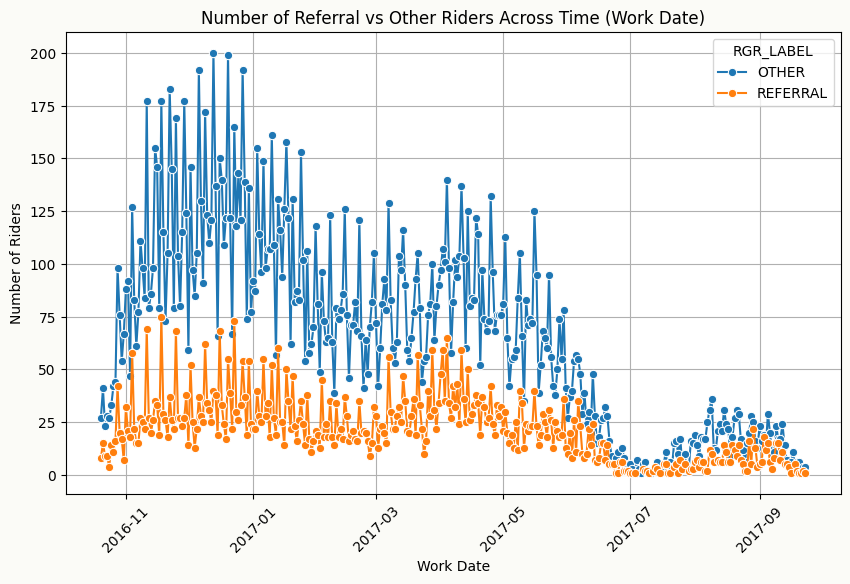

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'FIRST_WORK_DATE' is in datetime format (if it's not already)
df_rgr['FIRST_WORK_DATE'] = pd.to_datetime(df_rgr['FIRST_WORK_DATE'])

# Calculate the date based on DAYS_SINCE_ACQUISITION and FIRST_WORK_DATE
df_rgr['WORK_DATE'] = df_rgr['FIRST_WORK_DATE'] + pd.to_timedelta(df_rgr['DAYS_SINCE_ACQUISITION'], unit='D')


# Group by WORK_DATE and RGR_LABEL to count the number of riders per day
riders_per_day = df_rgr.groupby(['WORK_DATE', 'RGR_LABEL'])['RIDER_ID'].nunique().reset_index()

# Plotting the comparison between Referral and Other riders across time
plt.figure(figsize=(10, 6))
sns.lineplot(data=riders_per_day, x='WORK_DATE', y='RIDER_ID', hue='RGR_LABEL', marker='o')

# Customize the plot
plt.title("Number of Referral vs Other Riders Across Time (Work Date)")
plt.xlabel("Work Date")
plt.ylabel("Number of Riders")
plt.grid(True)

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')


# Show the plot
plt.show()


In [24]:
# Rates of Referral #

# referral count
df_referrals = df_rgr.groupby('RIDER_ID')['REFERRALS_CUMULATIVE'].max()
count_referrals = df_referrals.sum()

# successful referral count
df_successful_referrals = df_rgr.groupby('RIDER_ID')['SUCCESSFUL_REFERRALS_CUMULATIVE'].max()
count_successful_referrals = df_successful_referrals.sum()

print("Referral success rate:")
print(count_successful_referrals/count_referrals)

# count of riders who made a referral
count_rider_referrals = df_referrals.dropna().count()

print("Rate of riders who made a referral:")
print(count_rider_referrals / len(df_rgr['RIDER_ID'].unique()))

# average referrals per rider

print("Average rider referral:")
print(df_referrals.dropna().mean())

Referral success rate:
0.21820410665032178
Rate of riders who made a referral:
0.24954240390482002
Average rider referral:
2.659331703341483


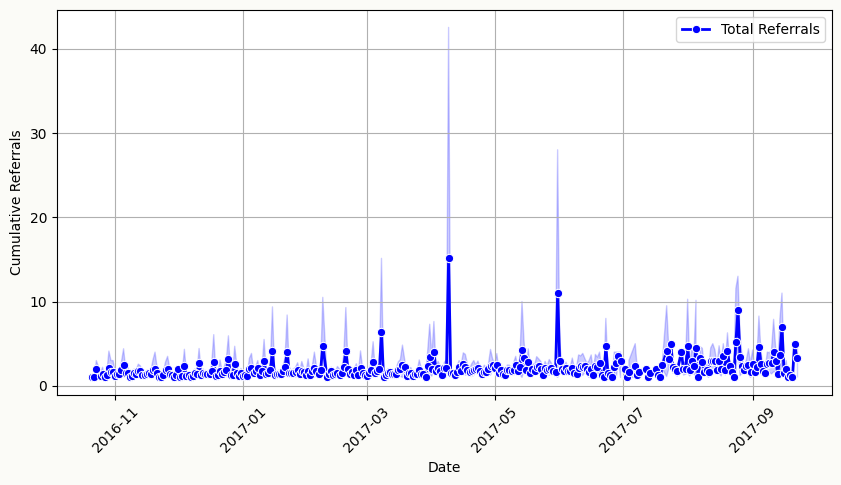

In [25]:
# Referrals across time #

# get date of referral
df_rgr['FIRST_WORK_DATE'] = pd.to_datetime(df_rgr['FIRST_WORK_DATE'])
df_rgr['REFERRAL_DATE'] = df_rgr['FIRST_WORK_DATE'] + pd.to_timedelta(df_rgr['DAYS_SINCE_ACQUISITION'], unit='D')

df_rgr = df_rgr.sort_values(by='REFERRAL_DATE')

plt.figure(figsize=(10, 5))
sns.lineplot(df_rgr, x='REFERRAL_DATE', y='REFERRALS_CUMULATIVE', marker='o', linewidth=2, color='blue', label='Total Referrals')

plt.xlabel('Date')
plt.ylabel('Cumulative Referrals')
plt.grid()
plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()


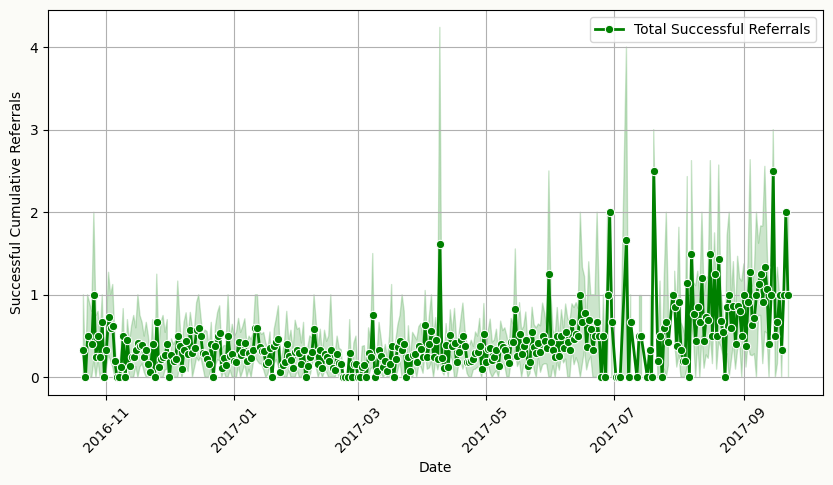

In [26]:
# Successful referrals across time #

# get date of referral
df_rgr['FIRST_WORK_DATE'] = pd.to_datetime(df_rgr['FIRST_WORK_DATE'])
df_rgr['REFERRAL_DATE'] = df_rgr['FIRST_WORK_DATE'] + pd.to_timedelta(df_rgr['DAYS_SINCE_ACQUISITION'], unit='D')

df_rgr = df_rgr.sort_values(by='REFERRAL_DATE')

plt.figure(figsize=(10, 5))
sns.lineplot(df_rgr, x='REFERRAL_DATE', y='SUCCESSFUL_REFERRALS_CUMULATIVE', marker='o', linewidth=2, color='green', label='Total Successful Referrals')

plt.xlabel('Date')
plt.ylabel('Successful Cumulative Referrals')
plt.grid()
plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()


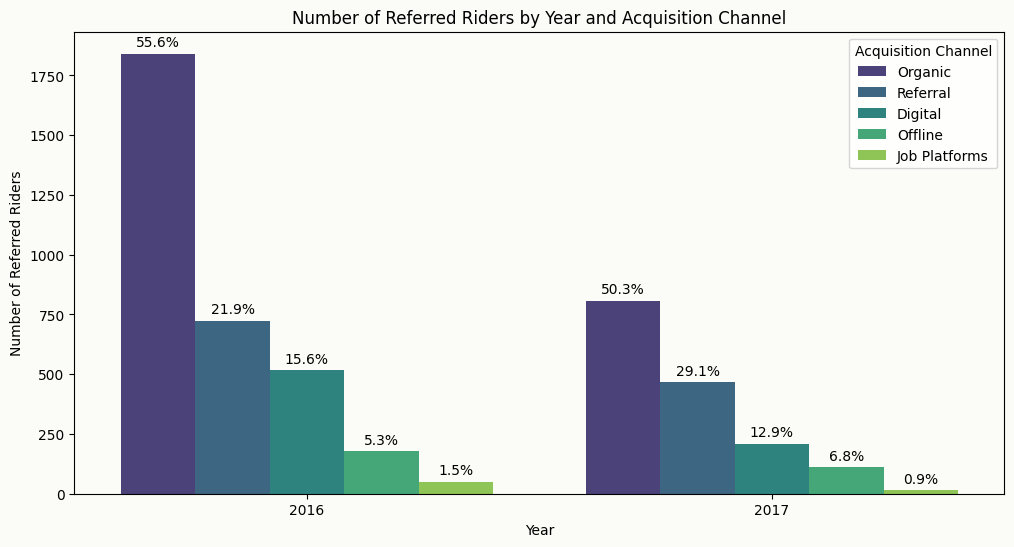

In [27]:
# Number of referred riders #
df_rgr = df_rgr.copy()

df_rgr.loc[:, 'FIRST_WORK_DATE'] = df_rgr['FIRST_WORK_DATE'].astype(str)
df_rgr.loc[:, 'FIRST_WORK_DATETIME'] = pd.to_datetime(df_rgr['FIRST_WORK_DATE'], errors='coerce')
df_rgr.loc[:, 'FIRST_WORK_YEAR'] = df_rgr['FIRST_WORK_DATETIME'].dt.year

yearly_counts = df_rgr.groupby(['FIRST_WORK_YEAR', 'ACQUISITION_CHANNEL'])['RIDER_ID'].nunique().reset_index()

yearly_counts = yearly_counts.sort_values(by=['FIRST_WORK_YEAR', 'RIDER_ID'], ascending=[True, False])

total_drivers_per_year = yearly_counts.groupby('FIRST_WORK_YEAR')['RIDER_ID'].sum()

yearly_counts['Percentage'] = yearly_counts.apply(
    lambda row: (row['RIDER_ID'] / total_drivers_per_year[row['FIRST_WORK_YEAR']]) * 100, axis=1
)


# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yearly_counts, x='FIRST_WORK_YEAR', y='RIDER_ID', hue='ACQUISITION_CHANNEL', palette='viridis')

for container, channel in zip(ax.containers, yearly_counts['ACQUISITION_CHANNEL'].unique()):
    labels = yearly_counts[yearly_counts['ACQUISITION_CHANNEL'] == channel]['Percentage'].round(1).astype(str) + '%'
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.xlabel("Year")
plt.ylabel("Number of Referred Riders")
plt.title("Number of Referred Riders by Year and Acquisition Channel")
plt.legend(title="Acquisition Channel")

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

# Show the plot
plt.show()



In [28]:

# Perform ANOVA to test for significant differences between years
anova_year = stats.f_oneway(
    *[df_rgr[df_rgr['FIRST_WORK_YEAR'] == year]['RIDER_ID'].values for year in df_rgr['FIRST_WORK_YEAR'].unique()]
)

# Perform ANOVA to test for significant differences between acquisition channels
anova_channel = stats.f_oneway(
    *[df_rgr[df_rgr['ACQUISITION_CHANNEL'] == channel]['RIDER_ID'].values for channel in df_rgr['ACQUISITION_CHANNEL'].unique()]
)

print(f"ANOVA p-value (Year): {anova_year.pvalue}")
print(f"ANOVA p-value (Acquisition Channel): {anova_channel.pvalue}")

# If p-value < 0.05, perform Tukey's HSD for pairwise comparisons
if anova_year.pvalue < 0.05:
    print("\nSignificant difference found between years, running Tukey's HSD test:")
    tukey_year = pairwise_tukeyhsd(df_rgr['RIDER_ID'], df_rgr['FIRST_WORK_YEAR'])
    print(tukey_year)

if anova_channel.pvalue < 0.05:
    print("\nSignificant difference found between acquisition channels, running Tukey's HSD test:")
    tukey_channel = pairwise_tukeyhsd(df_rgr['RIDER_ID'], df_rgr['ACQUISITION_CHANNEL'])
    print(tukey_channel)


ANOVA p-value (Year): 0.0
ANOVA p-value (Acquisition Channel): 2.0533406699989153e-49

Significant difference found between years, running Tukey's HSD test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  2016   2017 22723.9667   0.0 22554.9199 22893.0135   True
-----------------------------------------------------------

Significant difference found between acquisition channels, running Tukey's HSD test:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------------
      Digital Job Platforms  -992.5118 0.5747 -2820.2644  835.2408  False
      Digital       Offline  1788.0005    0.0   802.5104 2773.4906   True
      Digital       Organic   683.4389 0.0143    90.7406 1276.1372   True
      Digital

Throughput analysis

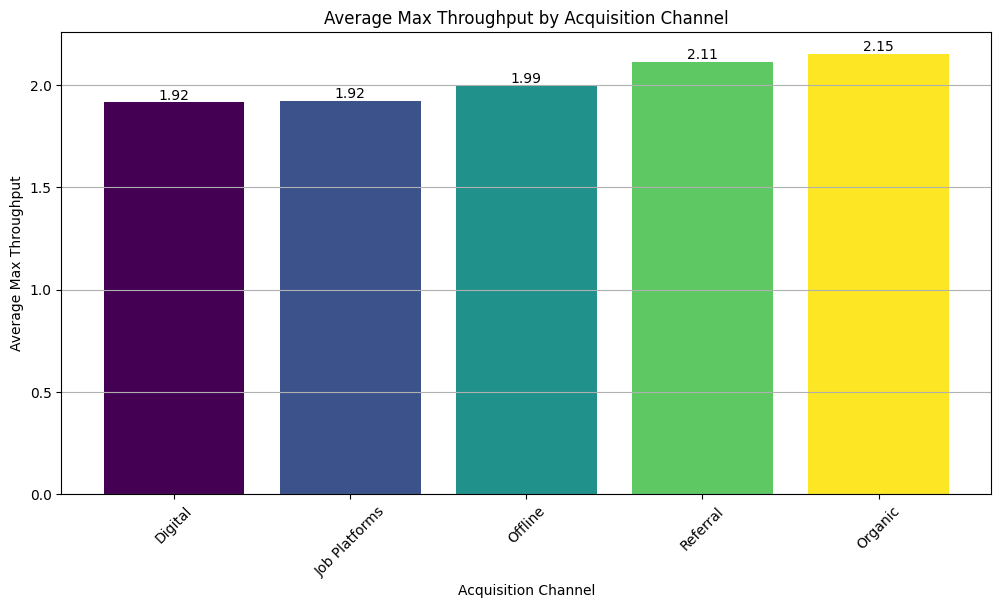

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find the maximum throughput for each rider (across all days)
max_throughput_df = df_rgr.groupby('RIDER_ID').agg(
    max_throughput=('THROUGHPUT_CUMULATIVE', 'max')
).reset_index()

# Step 2: Merge with the original DataFrame to get the Acquisition Channel
max_throughput_df = max_throughput_df.merge(
    df_rgr[['RIDER_ID', 'ACQUISITION_CHANNEL']].drop_duplicates(),
    on='RIDER_ID',
    how='left'
)

# Step 3: Group by Acquisition_channel and calculate the average of max throughput
grouped_df = max_throughput_df.groupby('ACQUISITION_CHANNEL').agg(
    avg_max_throughput=('max_throughput', 'mean')
).reset_index()

# Step 4: Sort the DataFrame by avg_max_throughput in ascending order
grouped_df = grouped_df.sort_values('avg_max_throughput', ascending=True)

# Step 5: Plotting the data
plt.figure(figsize=(12, 6))

# Create a color map for the bars (optional)
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(grouped_df)))

# Bar plot for average max throughput across each acquisition channel
bars = plt.bar(grouped_df['ACQUISITION_CHANNEL'], grouped_df['avg_max_throughput'], color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Customize the plot
plt.title('Average Max Throughput by Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Average Max Throughput')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed for readability
plt.grid(True, axis='y')

plt.show()


In [30]:
import pandas as pd
import scipy.stats as stats

# Group the max_throughput values by acquisition channel
channels = max_throughput_df['ACQUISITION_CHANNEL'].unique()

# Create a list of throughput values for each acquisition channel
grouped_data = [max_throughput_df[max_throughput_df['ACQUISITION_CHANNEL'] == channel]['max_throughput']
                for channel in channels]

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Output the ANOVA results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in average max throughput across acquisition channels.")
else:
    print("There is no statistically significant difference in average max throughput across acquisition channels.")


F-statistic: 21.814528647319005
P-value: 7.254626391127117e-18
There is a statistically significant difference in average max throughput across acquisition channels.


In [31]:
# Overview metrics #

# calculate the maximum values for each rider
max_orders_df = df_rgr.groupby('RIDER_ID').agg(
    max_orders_delivered=('ORDERS_DELIVERED_CUMULATIVE', 'max'),
    max_hours_worked=('HOURS_WORKED_CUMULATIVE', 'max'),
    referrals_cumulative=('REFERRALS_CUMULATIVE', 'max')  # To filter referral riders
).reset_index()

# Step 2: Filter out the riders who have made referrals (i.e., referrals_cumulative > 0)
referral_riders = max_orders_df[max_orders_df['referrals_cumulative'] > 0]

# Step 3: Calculate total number of orders and hours for all riders
total_orders_delivered = max_orders_df['max_orders_delivered'].sum()
total_hours_worked = max_orders_df['max_hours_worked'].sum()

# Step 4: Calculate total number of orders and hours for referral riders
total_orders_referrals = referral_riders['max_orders_delivered'].sum()
total_hours_referrals = referral_riders['max_hours_worked'].sum()

# Step 5: Output the results
print(f"Total Orders Delivered (All Riders): {total_orders_delivered}")
print(f"Total Hours Worked (All Riders): {total_hours_worked}")
print(f"Total Orders Delivered (Referral Riders): {total_orders_referrals}")
print(f"Total Hours Worked (Referral Riders): {total_hours_referrals}")


Total Orders Delivered (All Riders): 2188640
Total Hours Worked (All Riders): 1008638.8999999999
Total Orders Delivered (Referral Riders): 847756
Total Hours Worked (Referral Riders): 379983.4


Location Analysis 

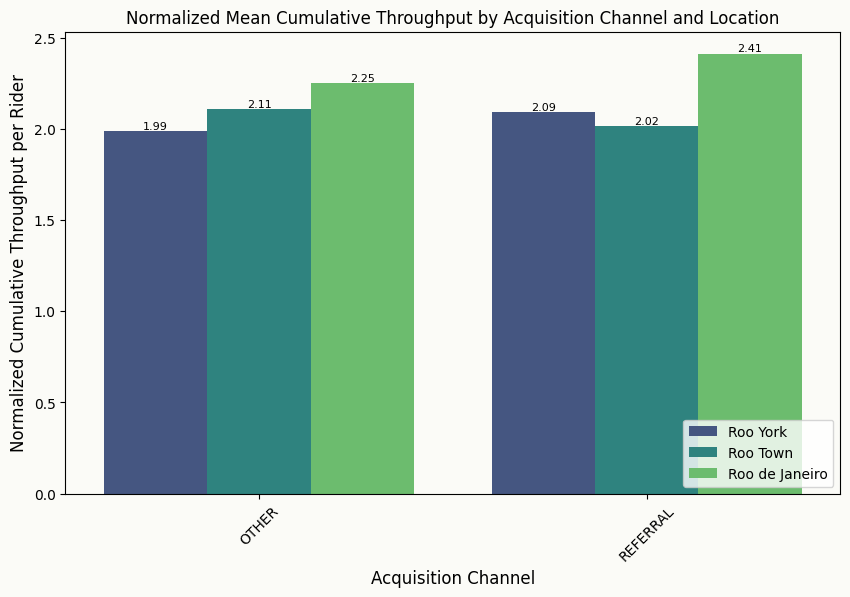

In [32]:
# Get max cumulative throughput per rider and location
df_max_throughput = df_rgr.groupby(['RIDER_ID', 'RGR_LABEL', 'LOCATION'])['THROUGHPUT_CUMULATIVE'].max().reset_index()

# Sum the throughput by acquisition channel and location
df_summary = df_max_throughput.groupby(['RGR_LABEL', 'LOCATION'])['THROUGHPUT_CUMULATIVE'].sum().reset_index()

# Count total riders per acquisition channel and location
riders_per_channel_location = df_max_throughput.groupby(['RGR_LABEL', 'LOCATION'])['RIDER_ID'].nunique().reset_index()
riders_per_channel_location.rename(columns={'RIDER_ID': 'TOTAL_RIDERS'}, inplace=True)

# Merge with summary to get the rider counts
df_summary = df_summary.merge(riders_per_channel_location, on=['RGR_LABEL', 'LOCATION'])

# Normalize throughput cumulative against respective acquisition population
df_summary['THROUGHPUT_CUMULATIVE_mean_normalized'] = df_summary['THROUGHPUT_CUMULATIVE'] / df_summary['TOTAL_RIDERS']

# Sort values by normalized throughput
df_summary = df_summary.sort_values(by='THROUGHPUT_CUMULATIVE_mean_normalized', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_summary, x='RGR_LABEL', y='THROUGHPUT_CUMULATIVE_mean_normalized', hue="LOCATION", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.xlabel("Acquisition Channel", fontsize=12)
plt.ylabel("Normalized Cumulative Throughput per Rider", fontsize=12)
plt.title("Normalized Mean Cumulative Throughput by Acquisition Channel and Location")

plt.xticks(rotation=45)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.gcf().set_facecolor('#fbfbf7')
ax.set_facecolor('#fbfbf7')

plt.show()


Kruskal-Wallis results for REFERRAL:
Statistic: 2.0, p-value: 0.36787944117144245

Kruskal-Wallis results for OTHER:
Statistic: 2.0, p-value: 0.36787944117144245



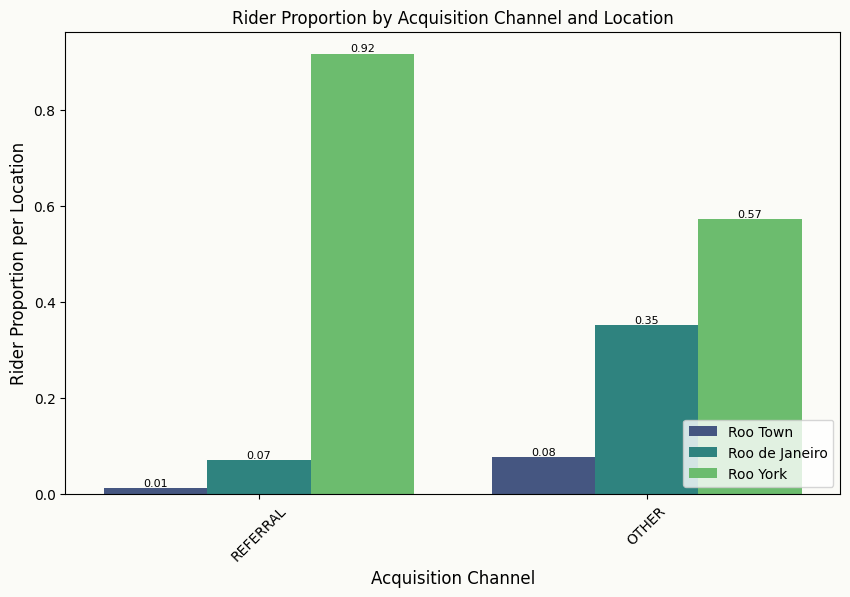

In [33]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique riders and their corresponding acquisition channel and location
df_riders = df_rgr[['RIDER_ID', 'RGR_LABEL', 'LOCATION']].drop_duplicates()

# Count total riders per acquisition channel and location
riders_per_channel_location = df_riders.groupby(['RGR_LABEL', 'LOCATION'])['RIDER_ID'].nunique().reset_index()
riders_per_channel_location.rename(columns={'RIDER_ID': 'TOTAL_RIDERS_IN_LOCATION'}, inplace=True)

# Count total riders per acquisition channel (across all locations)
riders_per_channel = df_riders.groupby(['RGR_LABEL'])['RIDER_ID'].nunique().reset_index()
riders_per_channel.rename(columns={'RIDER_ID': 'TOTAL_RIDERS_IN_CHANNEL'}, inplace=True)

# Merge total riders per channel with the location-wise rider counts to get rider proportions
df_summary = riders_per_channel_location.merge(riders_per_channel, on=['RGR_LABEL'])
df_summary['RIDER_PROPORTION'] = df_summary['TOTAL_RIDERS_IN_LOCATION'] / df_summary['TOTAL_RIDERS_IN_CHANNEL']

# Sort values by rider proportion
df_summary = df_summary.sort_values(by='RIDER_PROPORTION', ascending=True)

# Perform Kruskal-Wallis test for each acquisition channel separately
for acquisition_channel in df_summary['RGR_LABEL'].unique():
    channel_data = df_summary[df_summary['RGR_LABEL'] == acquisition_channel]
    
    # Group the data by location for Kruskal-Wallis test
    groups = [channel_data[channel_data['LOCATION'] == location]['RIDER_PROPORTION'] 
              for location in channel_data['LOCATION'].unique()]
    
    # Perform Kruskal-Wallis test
    stat, p_value = stats.kruskal(*groups)
    
    # Print the results for each acquisition channel
    print(f"Kruskal-Wallis results for {acquisition_channel}:")
    print(f"Statistic: {stat}, p-value: {p_value}\n")

# Plotting the rider proportions by acquisition channel and location
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_summary, x='RGR_LABEL', y='RIDER_PROPORTION', hue="LOCATION", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.xlabel("Acquisition Channel", fontsize=12)
plt.ylabel("Rider Proportion per Location", fontsize=12)
plt.title("Rider Proportion by Acquisition Channel and Location")

plt.xticks(rotation=45)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.gcf().set_facecolor('#fbfbf7')
ax.set_facecolor('#fbfbf7')

plt.show()


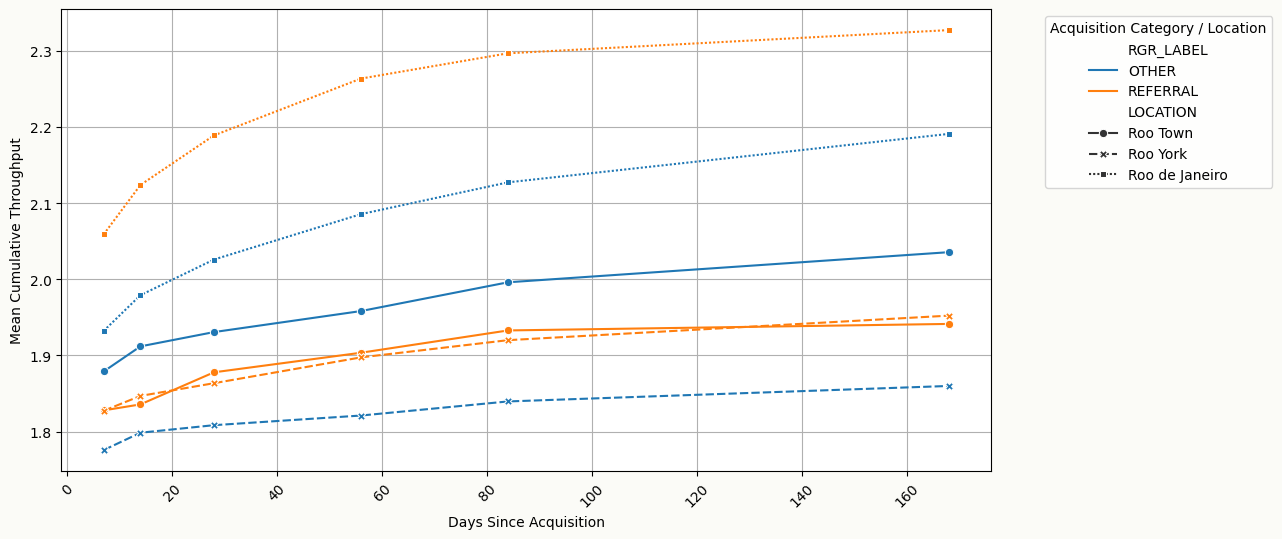

In [34]:
# Group by days since acquisition, acquisition category, and location, then compute mean throughput
df_grouped = df_rgr.groupby(['DAYS_SINCE_ACQUISITION', 'RGR_LABEL', 'LOCATION'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='DAYS_SINCE_ACQUISITION', y='THROUGHPUT_CUMULATIVE', hue='RGR_LABEL', style='LOCATION', markers=True)

# Labels and formatting
plt.xlabel('Days Since Acquisition')
plt.ylabel('Mean Cumulative Throughput')
plt.legend(title='Acquisition Category / Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()


Kruskal-Wallis results for OTHER:
Statistic: 4.0, p-value: 0.40600584970983794

Kruskal-Wallis results for REFERRAL:
Statistic: 2.0, p-value: 0.36787944117144245



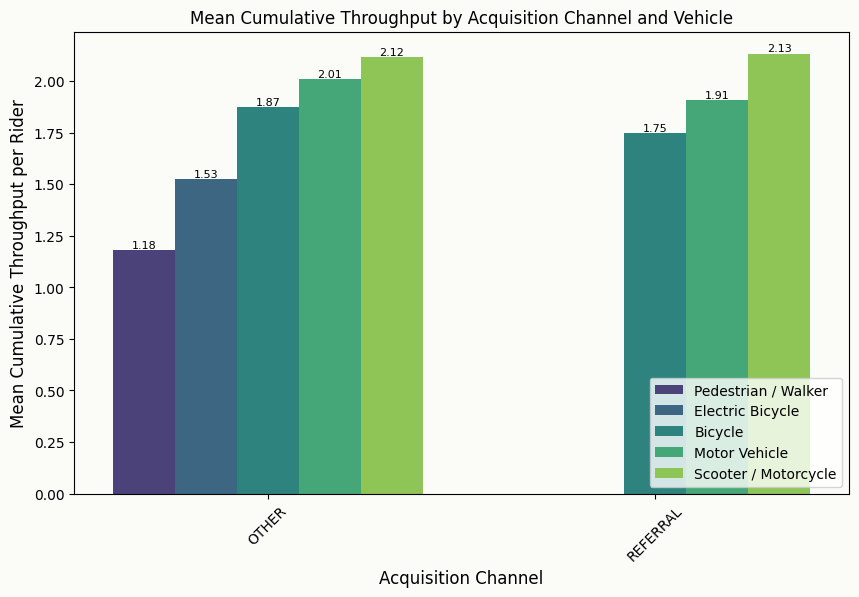

In [35]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Get the mean cumulative throughput per rider and location (instead of max)
df_mean_throughput = df_rgr.groupby(['RIDER_ID', 'RGR_LABEL', 'VEHICLE_TYPE'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Sum the mean throughput by acquisition channel and location (mean per rider)
df_summary = df_mean_throughput.groupby(['RGR_LABEL', 'VEHICLE_TYPE'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Count total riders per vehicle (across all acquisition channels)
riders_per_location = df_mean_throughput.groupby(['VEHICLE_TYPE'])['RIDER_ID'].nunique().reset_index()
riders_per_location.rename(columns={'RIDER_ID': 'TOTAL_RIDERS_IN_LOCATION'}, inplace=True)

# Merge with summary to get the total rider counts per vehicle
df_summary = df_summary.merge(riders_per_location, on=['VEHICLE_TYPE'])

# Sort values by mean throughput
df_summary = df_summary.sort_values(by='THROUGHPUT_CUMULATIVE', ascending=True)

# Perform Kruskal-Wallis test for each acquisition channel separately
for acquisition_channel in df_summary['RGR_LABEL'].unique():
    channel_data = df_summary[df_summary['RGR_LABEL'] == acquisition_channel]
    
    # Group the data by location for Kruskal-Wallis test
    groups = [channel_data[channel_data['VEHICLE_TYPE'] == location]['THROUGHPUT_CUMULATIVE'] 
              for location in channel_data['VEHICLE_TYPE'].unique()]
    
    # Perform Kruskal-Wallis test
    stat, p_value = stats.kruskal(*groups)
    
    # Print the results for each acquisition channel
    print(f"Kruskal-Wallis results for {acquisition_channel}:")
    print(f"Statistic: {stat}, p-value: {p_value}\n")

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_summary, x='RGR_LABEL', y='THROUGHPUT_CUMULATIVE', hue="VEHICLE_TYPE", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.xlabel("Acquisition Channel", fontsize=12)
plt.ylabel("Mean Cumulative Throughput per Rider", fontsize=12)
plt.title("Mean Cumulative Throughput by Acquisition Channel and Vehicle")

plt.xticks(rotation=45)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

plt.gcf().set_facecolor('#fbfbf7')
ax.set_facecolor('#fbfbf7')

plt.show()


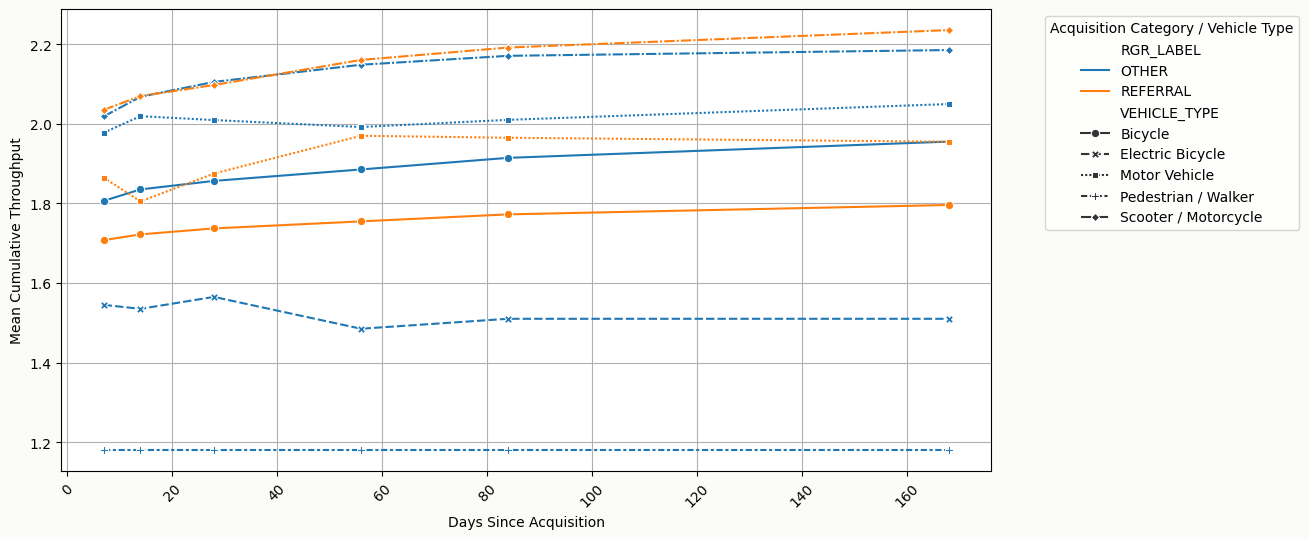

In [36]:
# Group by days since acquisition, acquisition category, and location, then compute mean throughput
df_grouped = df_rgr.groupby(['DAYS_SINCE_ACQUISITION', 'RGR_LABEL', 'VEHICLE_TYPE'])['THROUGHPUT_CUMULATIVE'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='DAYS_SINCE_ACQUISITION', y='THROUGHPUT_CUMULATIVE', hue='RGR_LABEL', style='VEHICLE_TYPE', markers=True)

# Labels and formatting
plt.xlabel('Days Since Acquisition')
plt.ylabel('Mean Cumulative Throughput')
plt.legend(title='Acquisition Category / Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(rotation=45)

plt.gcf().set_facecolor('#fbfbf7')  
ax.set_facecolor('#fbfbf7')

plt.show()
